<a href="https://colab.research.google.com/github/creepereye1204/HomeWork/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle --upgrade

In [2]:

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c plant-pathology-2021-fgvc8

In [6]:
import os
os.mkdir('/content/train')
os.mkdir('/content/test')
os.mkdir('/content/eval')

In [ ]:
!unzip /content/plant-pathology-2021-fgvc8.zip -d /content/

In [8]:
import pandas as pd

In [9]:
train=pd.read_csv('/content/train.csv')

In [10]:
for dir in ['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']:
  os.makedirs('/content/train/'+dir)
  os.makedirs('/content/test/'+dir)
  os.makedirs('/content/eval/'+dir)

In [11]:
new=pd.DataFrame(columns=['image','labels'])
for idx,(image,label) in enumerate(train.values):
  n=len(label.split())
  if n!=1:
    cols= ['image','labels']	
    for i in label.split():
      add_row = [[image,i]]	

      row_df = pd.DataFrame(data = add_row, columns = cols)	
                            
      new = pd.concat([new, row_df], ignore_index = True)
    train.drop(labels=idx,axis=0,inplace=True)

In [12]:
train=pd.concat([new,train],ignore_index=True)

In [13]:
train,other=train_test_split(train,  train_size= 0.6, shuffle= True)
test,eval=train_test_split(other,  train_size= 0.5, shuffle= True)

In [14]:
import shutil
def move(data,where):
  path='/content/train_images/'
  for name,label in data.values:
    if os.path.exists(path+name):
        shutil.move(path+name,"/content/"+where+"/"+label+'/'+name)

In [15]:
for key,value in {'train':train,'test':test,'eval':eval}.items():
  move(value,key)

In [16]:
train['labels'].isnull().sum()

0

In [17]:
train['labels'].value_counts()

scab                  3426
healthy               2743
frog_eye_leaf_spot    2610
complex               1320
rust                  1237
powdery_mildew         776
Name: labels, dtype: int64

In [18]:
import matplotlib.pyplot as plt


<Axes: >

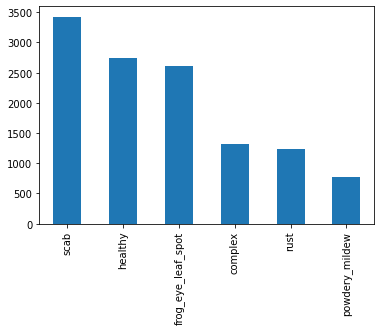

In [19]:
train['labels'].value_counts().plot(kind='bar')

In [20]:
len(train)

12112

In [21]:
test

,image,labels
5324,94b26d8dc50d69bc.jpg,healthy
9950,b5ad94c3485f217c.jpg,healthy
18902,f8a5c18a4fd423e5.jpg,healthy
4572,8def4d91382175c3.jpg,healthy
10632,bbd435b325715941.jpg,healthy
...,...,...
16551,e7bcc9c3d21909b4.jpg,rust
18154,f4211b926adbd6e0.jpg,healthy
22,8116dfcc0ccf6636.jpg,frog_eye_leaf_spot
5295,9499603eb54af786.jpg,rust


In [22]:
eval

,image,labels
4901,90ee3bc6896517b8.jpg,healthy
8180,aa9d23cc91c698db.jpg,rust
5669,96922bcb8358e769.jpg,healthy
19827,fe06ce32b8f108cd.jpg,healthy
13768,d1c23a95469d2dbc.jpg,frog_eye_leaf_spot
...,...,...
11978,c3e72536129379c5.jpg,powdery_mildew
4711,8f850aea4adfda82.jpg,healthy
2648,f53ee0b8ca09c88f.jpg,frog_eye_leaf_spot
6445,9f0f179c8ccc1ad2.jpg,frog_eye_leaf_spot


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [24]:
nc = 3
nz = 100
ngf = 64
ndf = 64
num_epochs = 5
lr = 0.0002
beta1 = 0.5
ngpu = 1

In [25]:
if torch.cuda.is_available():
  device=torch.device('cuda')

trans_train=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])
trans_test=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])
trans_eval=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(root='/content/train', 
                                    transform=trans_train,
                                   )
train_loader=DataLoader(dataset=train_data,batch_size=32,shuffle=True,drop_last=True,)

test_data = datasets.ImageFolder(root='/content/test', 
                                    transform=trans_test
                                   )
test_loader=DataLoader(dataset=test_data,batch_size=32,shuffle=True,drop_last=True)

eval_data = datasets.ImageFolder(root='/content/eval', 
                                    transform=trans_eval
                                   )
eval_loader=DataLoader(dataset=eval_data,batch_size=32,shuffle=True,drop_last=True)

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
real_batch=next(iter(train_loader))

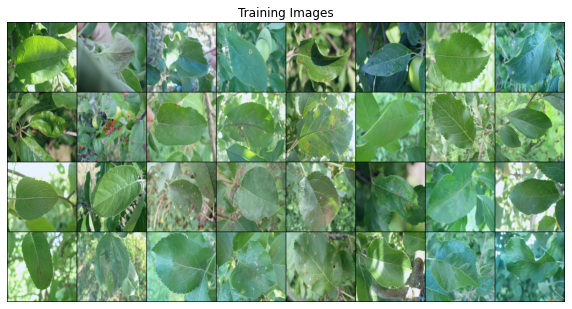

In [27]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Training Images')
plt.imshow(np.transpose(vutils.make_grid(real_batch[0],padding=2,normalize=True).cpu(),(1,2,0)));

In [29]:
from torchvision import models
import torch.optim as optim

In [ ]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
# 여기서 각 출력 샘플의 크기는 2로 설정합니다.
# 또는, nn.Linear(num_ftrs, len (class_names))로 일반화할 수 있습니다.
model_ft.fc = nn.Linear(num_ftrs, 6)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# 모든 매개변수들이 최적화되었는지 관찰
optim = optim.Adam(model_ft.parameters(), lr=0.001)


In [ ]:
model_ft.load_state_dict(torch.load('/content/drive/MyDrive/Plant_Pathology_lr_changed.pth'))

In [43]:
def train(R,optim,cri):
 
  for epoch in range(3):
    for index,sample in enumerate(train_loader):
      x,y=sample
      X=x.to(device)
      Y=y.to(device)
      out=R(X)
      cost=criterion(out,Y)
      optim.zero_grad()
      cost.backward()
      optim.step()
      if index%10==0:
        print('epoch {} , cost: {:.4f}'.format(epoch,cost.item()))
        test(R,cri)
        R.train()
      torch.save(R.state_dict(),'/content/drive/MyDrive/Plant_Pathology_lr_changed_new.pth')

In [44]:
def test(R,cri):
  R.eval()
  correct=0
  loss_avg=0
  with torch.no_grad():
    for index,sample in enumerate(test_loader):
      x,y=sample
      X=x.to(device)
      Y=y.to(device)
      out=R(X)
      cost=criterion(out,Y)
      loss_avg+=cost.item()
      prediction=out.max(1,keepdim=True)[1]
      correct+=prediction.eq(Y.view_as(prediction)).sum().item()
      


  test_accuracy=100*correct/len(test_loader.dataset)
  loss_avg/=len(test_loader.dataset)
  print('cost: {:.2f}%'.format(test_accuracy))
  print('loss_avg:',loss_avg)

In [ ]:
train(model_ft,optim,criterion)